<a href="https://colab.research.google.com/github/micsung/data_analysis_n_application/blob/main/20211208%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://colab.research.google.com/notebooks/snippets/sheets.ipynb#scrollTo=JiJVCmu3dhFa
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('20211208').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
df.columns = df.iloc[0,:]
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
df.reset_index(inplace=True)
print(df)

[['title', 'abstract ', 'text', 'paper_text'], ['On My Way', '', "I'm sorry but\nDon't wanna talk\nI need a moment before I go\nIt's nothing personal\n\nI draw the blinds\nThey don't need to see me cry\nCause even when they understand\nThey don't understand\n\nSo then when I'm finished\nI'm all 'bout my business\nAnd ready to save the world\nI'm takin my misery\nMake it my bitch\nCan't be everyone's favourite girl\n\nSo, take aim and fire away\nI've never been so wide awake\nNo, nobody but me can keep me safe\nAnd I'm on my way\nThe blood moon is on the rise\nThe fire burning in my eyes\nNo, nobody but me can keep me safe\nAnd I'm on my way\n\nLo siento mucho, pero me voy\nPor que a tu lado me di cuenta que nada soy\nY me cansé de luchar y de guerrear en vano\nDe estar en la línea de fuego y de meter la mano\n\n更多更詳盡歌詞 在 ※ Mojim.com\u3000魔鏡歌詞網\nAcepto mis errores, también soy humano\nY tu no vez que lo Hago por que te amo\n\nPero ya, no tengo mas na' que hacer aquí\nMe voy, llego la ho

In [ ]:
# encoding=utf-8
import jieba
for i in range(0,df.shape[0]):
  seg_list = jieba.cut(df.at[i,"text"], cut_all=False)
  df.at[i,"paper_text"] = " ".join(seg_list)
  df.at[i,"title"] = df.at[i,"paper_text"][0:10]
  df.at[i,"abstract"] = df.at[i,"paper_text"][0:20]

papers = df

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.138 seconds.
Prefix dict has been built successfully.


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    i ' m   sorry   but \n don ' t   wanna   talk ...
1    it ' s   so   uncomfortable   at   times \n fi...
Name: paper_text_processed, dtype: object

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
system("apt install libgsl-dev", intern=TRUE)
install.packages("topicmodels")
library(topicmodels)

data("AssociatedPress")
print(AssociatedPress)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘NLP’, ‘BH’, ‘modeltools’, ‘slam’, ‘tm’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/NLP_0.2-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 144368 bytes (140 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)


In [ ]:
%%R
ap_lda <- LDA(AssociatedPress, k = 2, control = list(seed = 1234))
ap_lda

A LDA_VEM topic model with 2 topics.


In [ ]:
%%R
install.packages("reshape2")
install.packages("tidytext")

library(tidytext)

ap_topics <- tidy(ap_lda, matrix = "beta")
ap_topics

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

# A tibble: 20,946 × 3
   topic term           beta
   <int> <chr>         <dbl>
 1     1 aaron      1.69e-12
 2     2 aaron      3.90e- 5
 3     1 abandon    2.65e- 5
 4     2 abandon    3.99e- 5
 5     1 abandoned  1.39e- 4
 6     2 abandoned  5.88e- 5
 7     1 abandoning 2.45e-33
 8     2 abandoning 2.34e- 5
 9     1 abbott     2.13e- 6
10     2 abbott     2.97e- 5
# … with 20,936 more rows


R[write to console]: Use suppressPackageStartupMessages() to eliminate package startup
messages

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




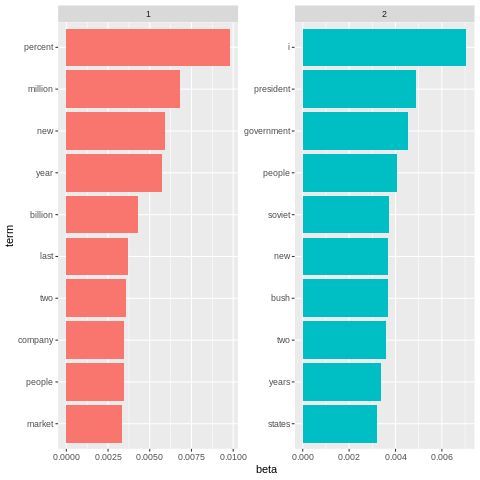

In [ ]:
%%R
library(ggplot2)
library(dplyr)

ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 10) %>% 
  ungroup() %>%
  arrange(topic, -beta)

ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

In [ ]:
%%R
library(tidyr)

beta_wide <- ap_topics %>%
  mutate(topic = paste0("topic", topic)) %>%
  pivot_wider(names_from = topic, values_from = beta) %>% 
  filter(topic1 > .001 | topic2 > .001) %>%
  mutate(log_ratio = log2(topic2 / topic1))

beta_wide

# A tibble: 198 × 4
   term              topic1      topic2 log_ratio
   <chr>              <dbl>       <dbl>     <dbl>
 1 administration 0.000431  0.00138         1.68 
 2 ago            0.00107   0.000842       -0.339
 3 agreement      0.000671  0.00104         0.630
 4 aid            0.0000476 0.00105         4.46 
 5 air            0.00214   0.000297       -2.85 
 6 american       0.00203   0.00168        -0.270
 7 analysts       0.00109   0.000000578   -10.9  
 8 area           0.00137   0.000231       -2.57 
 9 army           0.000262  0.00105         2.00 
10 asked          0.000189  0.00156         3.05 
# … with 188 more rows


In [ ]:
%%R
ap_documents <- tidy(ap_lda, matrix = "gamma")
ap_documents

# A tibble: 4,492 × 3
   document topic    gamma
      <int> <int>    <dbl>
 1        1     1 0.248   
 2        2     1 0.362   
 3        3     1 0.527   
 4        4     1 0.357   
 5        5     1 0.181   
 6        6     1 0.000588
 7        7     1 0.773   
 8        8     1 0.00445 
 9        9     1 0.967   
10       10     1 0.147   
# … with 4,482 more rows


In [ ]:
%%R
tidy(AssociatedPress) %>%
  filter(document == 6) %>%
  arrange(desc(count))

# A tibble: 287 × 3
   document term           count
      <int> <chr>          <dbl>
 1        6 noriega           16
 2        6 panama            12
 3        6 jackson            6
 4        6 powell             6
 5        6 administration     5
 6        6 economic           5
 7        6 general            5
 8        6 i                  5
 9        6 panamanian         5
10        6 american           4
# … with 277 more rows


In [ ]:
%%R
titles <- c("Twenty Thousand Leagues under the Sea", 
            "The War of the Worlds",
            "Pride and Prejudice", 
            "Great Expectations")

In [ ]:
%%R
install.packages("gutenbergr")
library(gutenbergr)

books <- gutenberg_works(title %in% titles) %>%
  gutenberg_download(meta_fields = "title")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gutenbergr_0.2.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3062753 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [ ]:
%%R
library(stringr)

# divide into documents, each representing one chapter
by_chapter <- books %>%
  group_by(title) %>%
  mutate(chapter = cumsum(str_detect(
    text, regex("^chapter ", ignore_case = TRUE)
  ))) %>%
  ungroup() %>%
  filter(chapter > 0) %>%
  unite(document, title, chapter)

# split into words
by_chapter_word <- by_chapter %>%
  unnest_tokens(word, text)

# find document-word counts
word_counts <- by_chapter_word %>%
  anti_join(stop_words) %>%
  count(document, word, sort = TRUE) %>%
  ungroup()

word_counts

Joining, by = "word"
# A tibble: 90,252 × 3
   document              word        n
   <chr>                 <chr>   <int>
 1 Great Expectations_57 joe        88
 2 Great Expectations_7  joe        70
 3 Great Expectations_17 biddy      63
 4 Great Expectations_27 joe        58
 5 Great Expectations_38 estella    58
 6 Great Expectations_2  joe        56
 7 Great Expectations_23 pocket     53
 8 Great Expectations_15 joe        50
 9 Great Expectations_18 joe        50
10 Great Expectations_9  joe        44
# … with 90,242 more rows


In [ ]:
%%R
chapters_dtm <- word_counts %>%
  cast_dtm(document, word, n)

chapters_dtm

<<DocumentTermMatrix (documents: 166, terms: 16401)>>
Non-/sparse entries: 90252/2632314
Sparsity           : 97%
Maximal term length: 19
Weighting          : term frequency (tf)


In [ ]:
%%R
chapters_lda <- LDA(chapters_dtm, k = 4, control = list(seed = 1234))
chapters_lda

A LDA_VEM topic model with 4 topics.


In [ ]:
%%R
chapter_topics <- tidy(chapters_lda, matrix = "beta")
chapter_topics

# A tibble: 65,604 × 3
   topic term         beta
   <int> <chr>       <dbl>
 1     1 joe     1.26e-  2
 2     2 joe     2.94e- 33
 3     3 joe     3.82e- 28
 4     4 joe     8.27e- 32
 5     1 biddy   4.14e-  3
 6     2 biddy   3.73e-127
 7     3 biddy   1.71e- 25
 8     4 biddy   2.31e- 37
 9     1 estella 4.30e-  3
10     2 estella 2.67e-  9
# … with 65,594 more rows


In [ ]:
%%R
top_terms <- chapter_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 5) %>% 
  ungroup() %>%
  arrange(topic, -beta)

top_terms

# A tibble: 20 × 3
   topic term         beta
   <int> <chr>       <dbl>
 1     1 joe       0.0126 
 2     1 miss      0.00678
 3     1 time      0.00653
 4     1 pip       0.00592
 5     1 looked    0.00581
 6     2 ned       0.0124 
 7     2 captain   0.0120 
 8     2 nautilus  0.00975
 9     2 land      0.00759
10     2 conseil   0.00674
11     3 elizabeth 0.0156 
12     3 darcy     0.00975
13     3 bennet    0.00771
14     3 miss      0.00764
15     3 jane      0.00722
16     4 captain   0.0162 
17     4 nautilus  0.0141 
18     4 nemo      0.00979
19     4 sea       0.00941
20     4 conseil   0.00659


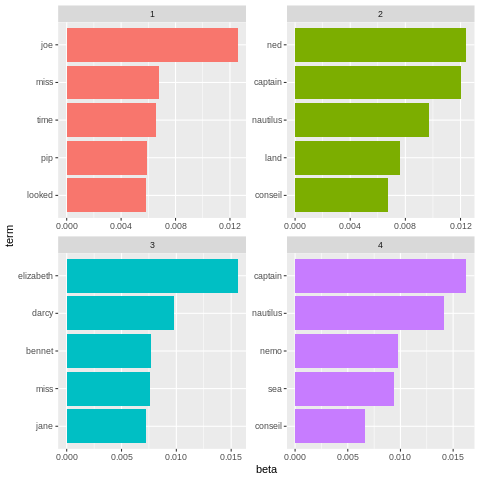

In [ ]:
%%R
library(ggplot2)

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

In [ ]:
%%R
chapters_gamma <- tidy(chapters_lda, matrix = "gamma")
chapters_gamma

# A tibble: 664 × 3
   document              topic gamma
   <chr>                 <int> <dbl>
 1 Great Expectations_57     1 1.00 
 2 Great Expectations_7      1 1.00 
 3 Great Expectations_17     1 0.992
 4 Great Expectations_27     1 1.00 
 5 Great Expectations_38     1 0.965
 6 Great Expectations_2      1 1.00 
 7 Great Expectations_23     1 0.549
 8 Great Expectations_15     1 1.00 
 9 Great Expectations_18     1 1.00 
10 Great Expectations_9      1 1.00 
# … with 654 more rows


In [ ]:
%%R
chapters_gamma <- chapters_gamma %>%
  separate(document, c("title", "chapter"), sep = "_", convert = TRUE)

chapters_gamma

# A tibble: 664 × 4
   title              chapter topic gamma
   <chr>                <int> <int> <dbl>
 1 Great Expectations      57     1 1.00 
 2 Great Expectations       7     1 1.00 
 3 Great Expectations      17     1 0.992
 4 Great Expectations      27     1 1.00 
 5 Great Expectations      38     1 0.965
 6 Great Expectations       2     1 1.00 
 7 Great Expectations      23     1 0.549
 8 Great Expectations      15     1 1.00 
 9 Great Expectations      18     1 1.00 
10 Great Expectations       9     1 1.00 
# … with 654 more rows


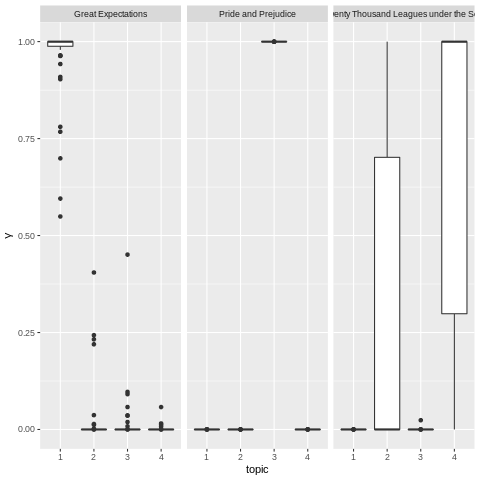

In [ ]:
%%R
chapters_gamma %>%
  mutate(title = reorder(title, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ title) +
  labs(x = "topic", y = expression(gamma))

In [ ]:
%%R
chapter_classifications <- chapters_gamma %>%
  group_by(title, chapter) %>%
  slice_max(gamma) %>%
  ungroup()

chapter_classifications

# A tibble: 166 × 4
   title              chapter topic gamma
   <chr>                <int> <int> <dbl>
 1 Great Expectations       1     1  1.00
 2 Great Expectations       2     1  1.00
 3 Great Expectations       3     1  1.00
 4 Great Expectations       4     1  1.00
 5 Great Expectations       5     1  1.00
 6 Great Expectations       6     1  1.00
 7 Great Expectations       7     1  1.00
 8 Great Expectations       8     1  1.00
 9 Great Expectations       9     1  1.00
10 Great Expectations      10     1  1.00
# … with 156 more rows


In [ ]:
%%R
book_topics <- chapter_classifications %>%
  count(title, topic) %>%
  group_by(title) %>%
  slice_max(n, n = 1) %>% 
  ungroup() %>%
  transmute(consensus = title, topic)

chapter_classifications %>%
  inner_join(book_topics, by = "topic") %>%
  filter(title != consensus)

# A tibble: 0 × 5
# … with 5 variables: title <chr>, chapter <int>, topic <int>, gamma <dbl>,
#   consensus <chr>


In [ ]:
%%R
assignments <- augment(chapters_lda, data = chapters_dtm)
assignments

# A tibble: 90,252 × 4
   document              term  count .topic
   <chr>                 <chr> <dbl>  <dbl>
 1 Great Expectations_57 joe      88      1
 2 Great Expectations_7  joe      70      1
 3 Great Expectations_17 joe       5      1
 4 Great Expectations_27 joe      58      1
 5 Great Expectations_2  joe      56      1
 6 Great Expectations_23 joe       1      1
 7 Great Expectations_15 joe      50      1
 8 Great Expectations_18 joe      50      1
 9 Great Expectations_9  joe      44      1
10 Great Expectations_13 joe      40      1
# … with 90,242 more rows


In [ ]:
%%R
assignments <- assignments %>%
  separate(document, c("title", "chapter"), 
           sep = "_", convert = TRUE) %>%
  inner_join(book_topics, by = c(".topic" = "topic"))

assignments

# A tibble: 81,803 × 6
   title              chapter term  count .topic consensus         
   <chr>                <int> <chr> <dbl>  <dbl> <chr>             
 1 Great Expectations      57 joe      88      1 Great Expectations
 2 Great Expectations       7 joe      70      1 Great Expectations
 3 Great Expectations      17 joe       5      1 Great Expectations
 4 Great Expectations      27 joe      58      1 Great Expectations
 5 Great Expectations       2 joe      56      1 Great Expectations
 6 Great Expectations      23 joe       1      1 Great Expectations
 7 Great Expectations      15 joe      50      1 Great Expectations
 8 Great Expectations      18 joe      50      1 Great Expectations
 9 Great Expectations       9 joe      44      1 Great Expectations
10 Great Expectations      13 joe      40      1 Great Expectations
# … with 81,793 more rows


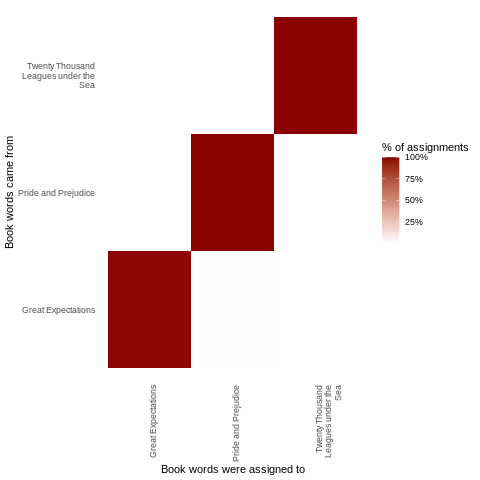

In [ ]:
%%R
library(scales)

assignments %>%
  count(title, consensus, wt = count) %>%
  mutate(across(c(title, consensus), ~str_wrap(., 20))) %>%
  group_by(title) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(consensus, title, fill = percent)) +
  geom_tile() +
  scale_fill_gradient2(high = "darkred", label = percent_format()) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        panel.grid = element_blank()) +
  labs(x = "Book words were assigned to",
       y = "Book words came from",
       fill = "% of assignments")

In [ ]:
%%R
wrong_words <- assignments %>%
  filter(title != consensus)
wrong_words

# A tibble: 434 × 6
   title                                 chapter term    count .topic consensus 
   <chr>                                   <int> <chr>   <dbl>  <dbl> <chr>     
 1 Great Expectations                         46 captain     1      4 Twenty Th…
 2 Great Expectations                         54 sea         2      4 Twenty Th…
 3 Twenty Thousand Leagues under the Sea       3 dear        1      3 Pride and…
 4 Great Expectations                         23 love        1      3 Pride and…
 5 Great Expectations                         23 lady        3      3 Pride and…
 6 Great Expectations                         23 sister      1      3 Pride and…
 7 Great Expectations                         23 jane       10      3 Pride and…
 8 Great Expectations                         30 jane        1      3 Pride and…
 9 Great Expectations                         22 jane        1      3 Pride and…
10 Great Expectations                         33 jane        1      3 Pride and…
# … with

In [ ]:
%%R
wrong_words %>%
  count(title, consensus, term, wt = count) %>%
  ungroup() %>%
  arrange(desc(n))

# A tibble: 420 × 4
   title              consensus           term         n
   <chr>              <chr>               <chr>    <dbl>
 1 Great Expectations Pride and Prejudice jane        13
 2 Great Expectations Pride and Prejudice speak        7
 3 Great Expectations Pride and Prejudice brother      6
 4 Great Expectations Pride and Prejudice coiler       6
 5 Great Expectations Pride and Prejudice belinda      5
 6 Great Expectations Pride and Prejudice children     4
 7 Great Expectations Pride and Prejudice amiable      3
 8 Great Expectations Pride and Prejudice carriage     3
 9 Great Expectations Pride and Prejudice daughter     3
10 Great Expectations Pride and Prejudice domestic     3
# … with 410 more rows


In [ ]:
%%R
word_counts %>%
  filter(word == "flopson")

# A tibble: 3 × 3
  document              word        n
  <chr>                 <chr>   <int>
1 Great Expectations_22 flopson    10
2 Great Expectations_23 flopson     7
3 Great Expectations_33 flopson     1


讀檔https://www.basketball-reference.com/leagues/NBA_2014_games.html

In [ ]:
import pandas as pd
data_filename= "nba.csv"
dataset = pd.read_csv(data_filename)
dataset.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Box Score,OT,Attend.,Notes
0,Tue Oct 29 2013,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN
1,Tue Oct 29 2013,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN
2,Tue Oct 29 2013,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN
3,Wed Oct 30 2013,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN
4,Wed Oct 30 2013,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN


In [ ]:
dataset.columns = ["Date","Start","Visitor Team","VisitorPts","Home Team","HomePts","Score Type","OT?","Atten.,","Notes"]
dataset.iloc[:5]

,Date,Start,Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,"Atten.,",Notes
0,Tue Oct 29 2013,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN
1,Tue Oct 29 2013,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN
2,Tue Oct 29 2013,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN
3,Wed Oct 30 2013,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN
4,Wed Oct 30 2013,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN


In [ ]:
dataset.to_csv("clean_nba.csv")

In [ ]:
dataset["HomeWin"] = dataset["VisitorPts"] < dataset["HomePts"]
dataset

,Date,Start,Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,"Atten.,",Notes,HomeWin
0,Tue Oct 29 2013,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,True
1,Tue Oct 29 2013,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,True
2,Tue Oct 29 2013,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,True
3,Wed Oct 30 2013,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,True
4,Wed Oct 30 2013,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN,True
5,Wed Oct 30 2013,7:00p,Miami Heat,110,Philadelphia 76ers,114,Box Score,NaN,19523,NaN,True
6,Wed Oct 30 2013,7:30p,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,True
7,Wed Oct 30 2013,7:30p,Milwaukee Bucks,83,New York Knicks,90,Box Score,NaN,19812,NaN,True
8,Wed Oct 30 2013,8:00p,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,False
9,Wed Oct 30 2013,8:00p,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,True


In [ ]:
print("Home Win percentage: {0:.1f}%".format(100 * dataset["HomeWin"].sum() / dataset["HomeWin"].count()))

Home Win percentage: 89.5%


取的主場是否獲勝


In [ ]:
y_true = dataset["HomeWin"].values

In [ ]:
dataset["HomeLastWin"] = False
dataset["VisitorLastWin"] = False

In [ ]:
from collections import defaultdict
won_last = defaultdict(int)
print(won_last)

defaultdict(<class 'int'>, {})


In [ ]:
for index, row in dataset.sort_values("Date").iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeLastWin"] = won_last[home_team]
    row["VisitorLastWin"] = won_last[visitor_team]
    dataset.loc[index] = row    
    # Set current win
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row["HomeWin"]

print(dataset)
dataset.to_csv("won_last_nba.csv")

               Date   Start  ... HomeLastWin  VisitorLastWin
0   Tue Oct 29 2013   7:00p  ...           0               0
1   Tue Oct 29 2013   8:00p  ...           0            True
2   Tue Oct 29 2013  10:30p  ...           0            True
3   Wed Oct 30 2013   7:00p  ...           0               0
4   Wed Oct 30 2013   7:00p  ...           0               0
5   Wed Oct 30 2013   7:00p  ...           0            True
6   Wed Oct 30 2013   7:30p  ...           0               0
7   Wed Oct 30 2013   7:30p  ...       False               0
8   Wed Oct 30 2013   8:00p  ...           0            True
9   Wed Oct 30 2013   8:00p  ...           0           False
10  Wed Oct 30 2013   8:00p  ...           0               0
11  Wed Oct 30 2013   8:30p  ...           0               0
12  Wed Oct 30 2013   8:30p  ...           0               0
13  Wed Oct 30 2013   9:00p  ...           0               0
14  Wed Oct 30 2013  10:00p  ...           0               0
15  Wed Oct 30 2013  10:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14,criterion="entropy")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

# Create a dataset with just the neccessary information
X_previouswins = dataset[["HomeLastWin", "VisitorLastWin"]].values
clf = DecisionTreeClassifier(random_state=14,criterion="entropy")
clf.fit(X_previouswins,y_true)
scores = cross_val_score(clf, X_previouswins, y_true, scoring='accuracy')
print("Using just the last result from the home and visitor teams")
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))

Using just the last result from the home and visitor teams
Accuracy: 90.0%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.485\nsamples = 19\nvalue = [2, 17]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

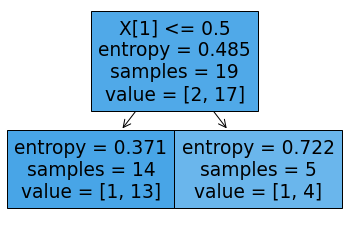

In [ ]:
from sklearn import tree
 
tree.plot_tree(clf,filled = True)